Business Case: 
    After carrying the EDA and data cleansing, we define the business case. 
    We set to improve the ML model taking into account the variables that are highly related to the sale price. We believe that for those houses that have special features, the model will not be able to predict the house price accurately since these features cannot be taken into account as only some houses have them and may not even be in the collected data (i.e. sea views, proximity to public transport stations, etc). 
    Hence, our models will predict the house sale price for those houses that are considered to have standard features.

In [117]:
# Adding needed libraries and reading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import norm
from scipy import stats
%matplotlib inline


In [2]:
import sys
sys.path.insert(0,'C:/Users/jugat/Documents/a_JUGATX/FORMACION/DATA SCIENCE/Functions')

from fx_OUTLIERS import *
from functions_plot_EDA import *
from Functions_ML_classification import *
from fx_MLRegression import *

In [3]:
SEED = 7
np.random.seed(SEED)

In [4]:
data = pd.read_csv('../dataset/house_prices_data_final.csv', )
data.head()

,Unnamed: 0,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,SalePrice,Neighborhood_code,Exterior1st_code,Exterior2nd_code,ExterQual,BsmtQual,KitchenQual
0,0,7,1710,856,856,2,208500,5,11,13,1,1,1
1,1,6,1262,1262,1262,2,181500,24,7,8,2,1,2
2,2,7,1786,920,920,2,223500,5,11,13,1,1,1
3,3,7,1717,756,961,3,140000,6,12,15,2,2,1
4,4,8,2198,1145,1145,3,250000,15,11,13,1,1,1


In [5]:
data.shape

(1317, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         1317 non-null   int64
 1   OverallQual        1317 non-null   int64
 2   GrLivArea          1317 non-null   int64
 3   TotalBsmtSF        1317 non-null   int64
 4   1stFlrSF           1317 non-null   int64
 5   GarageCars         1317 non-null   int64
 6   SalePrice          1317 non-null   int64
 7   Neighborhood_code  1317 non-null   int64
 8   Exterior1st_code   1317 non-null   int64
 9   Exterior2nd_code   1317 non-null   int64
 10  ExterQual          1317 non-null   int64
 11  BsmtQual           1317 non-null   int64
 12  KitchenQual        1317 non-null   int64
dtypes: int64(13)
memory usage: 133.9 KB


In [7]:
data.drop(['Unnamed: 0'], axis=1, inplace = True)

In [8]:
data.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars',
       'SalePrice', 'Neighborhood_code', 'Exterior1st_code',
       'Exterior2nd_code', 'ExterQual', 'BsmtQual', 'KitchenQual'],
      dtype='object')

### Multilinear Regression


`Step 1:  Define the target variable  (the variable/value that you want to predict)`


features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars','Neighborhood_code', 'Exterior1st_code','Exterior2nd_code', 'ExterQual', 'BsmtQual', 'KitchenQual']
target = ['SalePrice']

In [9]:
X = data.drop(['SalePrice'], axis = 1)
y = data['SalePrice']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([1.41901532e+05, 2.11871009e+05, 1.51977743e+05, 1.09911104e+05,
       1.80780700e+05, 1.53418570e+05, 2.97993590e+05, 2.99503040e+05,
       2.66700885e+05, 1.99842603e+05, 1.99187632e+05, 1.81611545e+05,
       2.10901542e+05, 2.73777495e+05, 2.29828783e+05, 1.27279543e+05,
       3.90230813e+05, 2.98630958e+05, 2.23919273e+05, 1.06045915e+05,
       1.83388168e+05, 1.24573126e+05, 1.60532686e+05, 2.24280055e+05,
       1.29794774e+05, 2.50545325e+05, 1.55170702e+05, 2.31417330e+05,
       1.63288772e+05, 1.50667257e+05, 2.63599207e+05, 2.04101417e+05,
       1.00505690e+05, 1.69804789e+05, 1.78351724e+05, 1.83548160e+05,
       9.92162118e+04, 8.76096848e+04, 1.40855919e+05, 8.60777894e+04,
       2.56771589e+05, 2.11249666e+05, 7.83518025e+04, 1.40556928e+05,
       2.52969676e+05, 2.26031351e+05, 2.67559958e+05, 3.00666072e+05,
       1.15124063e+05, 3.51648991e+02, 3.10476830e+05, 1.12535136e+05,
       2.27686968e+05, 1.59147300e+05, 1.06410254e+05, 1.83355382e+05,
      

In [13]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([254445.25294757, 126963.89773008, 214820.12814504,  85646.13416205,
       113908.27979163, 132055.13005083, 251489.57182095, 129319.18025761,
       185088.16458815, 176833.43921924, 110187.06950752, 157226.90740586,
       177503.76202573, 307734.3246363 , 173631.16771909,  91508.45712872,
       207525.61165342, 166071.65828639, 149776.59231725, 279203.35460583,
       139493.68437446, 174625.00498601, 130200.378979  , 185702.985681  ,
       237400.1865807 , 205928.87861944, 150652.58090114, 210016.04633058,
       173466.1727395 , 275316.8262568 , 192176.21109689, 140015.97908648,
       156988.90850653, 207835.96069958, 243184.91458866, 159961.58214171,
       141350.25159618, 249753.98839858, 294152.58963826, 282413.50239827,
       161778.5966781 , 103126.98767395, 111898.61805735, 297047.87425935,
       162539.99512531, 121292.10035513,  55557.95906957, 197039.40334534,
       164698.87887444, 195084.99549432, 201577.92514755, 146163.5351407 ,
       134592.66208521, 1

Evaluate the model

In [14]:
print(regressor.coef_)

[ 2.25474690e+04  4.77369249e+01  5.17519970e+01 -1.21123248e+01
  1.85062637e+04  4.41954324e+02 -1.58079789e+02  2.52872775e+02
 -1.76094861e+03  4.06911657e+03  3.35976352e+03]


In [15]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.7796632011725486


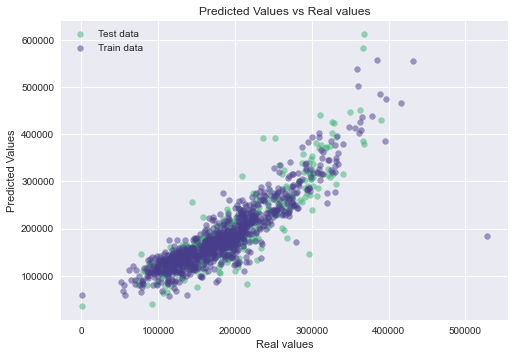

In [16]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [17]:
reg_metrics = Allmetrics(regressor, X_train,y_train,X_test,y_test)
reg_metrics 

,MAE,MSE,RMSE,R2,CV_R2
Train,22639.584018,1.045371e+09,32332.204241,0.799089,0.751
Test,25263.891337,1.408839e+09,37534.507217,0.779663,NaN


In [18]:
print('Min value SalePrice', data['SalePrice'].min())
print('Max value SalePrice', data['SalePrice'].max())

Min value SalePrice 35311
Max value SalePrice 611657


### Polynomial

In [19]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.000e+00, 7.000e+00, 1.710e+03, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 6.000e+00, 1.262e+03, ..., 1.000e+00, 2.000e+00,
        4.000e+00],
       [1.000e+00, 7.000e+00, 1.786e+03, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 7.000e+00, 2.340e+03, ..., 4.000e+00, 2.000e+00,
        1.000e+00],
       [1.000e+00, 5.000e+00, 1.078e+03, ..., 4.000e+00, 2.000e+00,
        1.000e+00],
       [1.000e+00, 5.000e+00, 1.256e+03, ..., 4.000e+00, 4.000e+00,
        4.000e+00]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.33, random_state = 42)

In [21]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train, y_train)

LinearRegression()

In [22]:
accuracy = lin_reg_2.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.8055014952374772


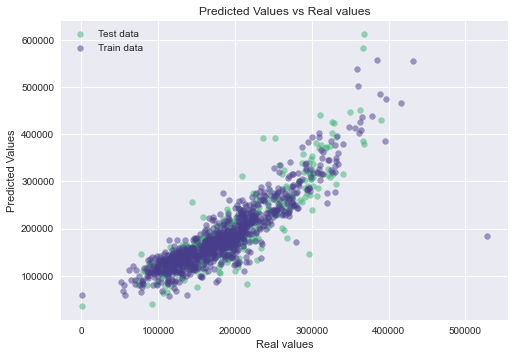

In [23]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [24]:
lin_reg_2_metrics = Allmetrics(lin_reg_2, X_train,y_train,X_test,y_test)
lin_reg_2_metrics

,MAE,MSE,RMSE,R2,CV_R2
Train,17777.966663,5.642466e+08,23753.875873,0.891557,0.738
Test,22775.825355,1.243629e+09,35265.117419,0.805501,NaN


### Random Forest Regression

In [25]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train , y_train)

RandomForestRegressor()

In [26]:
rf_metrics = Allmetrics(reg_rf, X_train, y_train, X_test, y_test)
rf_metrics 

,MAE,MSE,RMSE,R2,CV_R2
Train,7009.080901,1.109166e+08,10531.693051,0.978683,0.824
Test,22223.005390,1.111117e+09,33333.421067,0.826226,NaN


#### Hyper Tuning

##### Grid Search CV

In [46]:
param_grid = {'max_depth':[50, 60, 75], 
              'n_estimators':[1400, 1425, 1450],
              'max_features':['sqrt'],
              'min_samples_split':[4, 5, 6], 
              'min_impurity_decrease':[0],
              'oob_score' :[True],
              'min_samples_leaf' :[1], 
              'bootstrap':[ True], 
              'criterion':["mse"]}

rand_frst_reg = RandomForestRegressor(random_state=42, n_estimators=n_estimators)

grid_rand_forest = GridSearchCV(rand_frst_reg, param_grid, scoring="r2", 
                                n_jobs=-1, verbose=1)

In [47]:
%%time
grid_rand_forest.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  7.9min finished


Wall time: 8min 3s


GridSearchCV(estimator=RandomForestRegressor(n_estimators=[200, 400, 600, 800,
                                                           1000, 1200, 1400,
                                                           1600, 1800],
                                             random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [50, 60, 75], 'max_features': ['sqrt'],
                         'min_impurity_decrease': [0], 'min_samples_leaf': [1],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [1400, 1425, 1450],
                         'oob_score': [True]},
             scoring='r2', verbose=1)

In [48]:
grid_rand_forest.best_estimator_

RandomForestRegressor(max_depth=50, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_split=6,
                      n_estimators=1450, oob_score=True, random_state=42)

In [50]:
reg_rf_grid = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=1450, n_jobs=-1,
           oob_score=True, random_state=42, verbose=10, warm_start=False)

reg_rf_grid.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


building tree 1 of 1450
building tree 2 of 1450building tree 3 of 1450
building tree 4 of 1450

building tree 5 of 1450
building tree 6 of 1450building tree 7 of 1450

building tree 8 of 1450
building tree 9 of 1450building tree 10 of 1450

building tree 11 of 1450building tree 12 of 1450
building tree 13 of 1450

building tree 14 of 1450
building tree 15 of 1450
building tree 16 of 1450
building tree 17 of 1450building tree 18 of 1450

building tree 19 of 1450
building tree 20 of 1450
building tree 21 of 1450
building tree 22 of 1450
building tree 23 of 1450
building tree 24 of 1450
building tree 25 of 1450
building tree 26 of 1450
building tree 27 of 1450building tree 28 of 1450

building tree 29 of 1450building tree 30 of 1450

building tree 31 of 1450
building tree 32 of 1450building tree 33 of 1450
building tree 34 of 1450

building tree 35 of 1450
building tree 36 of 1450
building tree 37 of 1450
building tree 38 of 1450building tree 39 of 1450
building tree 40 of 1450

building 

[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.3s



building tree 57 of 1450
building tree 58 of 1450building tree 59 of 1450

building tree 60 of 1450
building tree 61 of 1450
building tree 62 of 1450
building tree 63 of 1450building tree 64 of 1450

building tree 65 of 1450building tree 66 of 1450

building tree 67 of 1450
building tree 68 of 1450
building tree 69 of 1450
building tree 70 of 1450building tree 71 of 1450
building tree 72 of 1450

building tree 73 of 1450building tree 74 of 1450building tree 75 of 1450


building tree 76 of 1450
building tree 77 of 1450
building tree 78 of 1450
building tree 79 of 1450
building tree 80 of 1450
building tree 81 of 1450
building tree 82 of 1450
building tree 83 of 1450
building tree 84 of 1450building tree 85 of 1450

building tree 86 of 1450
building tree 87 of 1450
building tree 88 of 1450
building tree 89 of 1450
building tree 90 of 1450
building tree 91 of 1450building tree 92 of 1450

building tree 93 of 1450
building tree 94 of 1450
building tree 95 of 1450building tree 96 of 1450


[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    0.4s


building tree 106 of 1450building tree 107 of 1450

building tree 108 of 1450
building tree 109 of 1450
building tree 110 of 1450
building tree 111 of 1450building tree 112 of 1450
building tree 113 of 1450building tree 114 of 1450


building tree 115 of 1450
building tree 116 of 1450
building tree 117 of 1450building tree 118 of 1450

building tree 119 of 1450
building tree 120 of 1450
building tree 121 of 1450building tree 122 of 1450

building tree 123 of 1450
building tree 124 of 1450
building tree 125 of 1450
building tree 126 of 1450
building tree 127 of 1450
building tree 128 of 1450
building tree 129 of 1450
building tree 130 of 1450
building tree 131 of 1450
building tree 132 of 1450building tree 133 of 1450

building tree 134 of 1450building tree 135 of 1450building tree 136 of 1450


building tree 137 of 1450
building tree 138 of 1450
building tree 139 of 1450building tree 140 of 1450
building tree 141 of 1450building tree 142 of 1450
building tree 143 of 1450

building tree

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s


building tree 205 of 1450

building tree 206 of 1450
building tree 207 of 1450building tree 208 of 1450building tree 209 of 1450


building tree 210 of 1450building tree 211 of 1450building tree 212 of 1450

building tree 213 of 1450

building tree 214 of 1450
building tree 215 of 1450
building tree 216 of 1450
building tree 217 of 1450building tree 218 of 1450

building tree 219 of 1450
building tree 220 of 1450building tree 221 of 1450

building tree 222 of 1450building tree 223 of 1450building tree 224 of 1450building tree 225 of 1450



building tree 226 of 1450
building tree 227 of 1450building tree 228 of 1450building tree 229 of 1450


building tree 230 of 1450
building tree 231 of 1450
building tree 232 of 1450
building tree 233 of 1450building tree 234 of 1450building tree 235 of 1450


building tree 236 of 1450building tree 237 of 1450

building tree 238 of 1450
building tree 239 of 1450building tree 240 of 1450building tree 241 of 1450


building tree 242 of 1450
building tr

[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    0.9s


building tree 251 of 1450building tree 252 of 1450

building tree 253 of 1450building tree 254 of 1450

building tree 255 of 1450
building tree 256 of 1450
building tree 257 of 1450
building tree 258 of 1450building tree 259 of 1450

building tree 260 of 1450building tree 261 of 1450

building tree 262 of 1450building tree 263 of 1450
building tree 264 of 1450building tree 265 of 1450

building tree 266 of 1450building tree 267 of 1450


building tree 268 of 1450
building tree 269 of 1450building tree 270 of 1450

building tree 271 of 1450
building tree 272 of 1450building tree 273 of 1450

building tree 274 of 1450
building tree 275 of 1450
building tree 276 of 1450
building tree 277 of 1450building tree 278 of 1450

building tree 279 of 1450building tree 280 of 1450

building tree 281 of 1450
building tree 282 of 1450building tree 283 of 1450

building tree 284 of 1450building tree 285 of 1450

building tree 286 of 1450
building tree 287 of 1450
building tree 288 of 1450
building tre

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:    1.1s


building tree 298 of 1450

building tree 299 of 1450
building tree 300 of 1450building tree 301 of 1450

building tree 302 of 1450
building tree 303 of 1450building tree 304 of 1450

building tree 305 of 1450building tree 306 of 1450

building tree 307 of 1450building tree 308 of 1450

building tree 309 of 1450building tree 310 of 1450
building tree 311 of 1450building tree 312 of 1450


building tree 313 of 1450building tree 314 of 1450

building tree 315 of 1450building tree 316 of 1450building tree 317 of 1450building tree 318 of 1450

building tree 319 of 1450


building tree 320 of 1450
building tree 321 of 1450
building tree 322 of 1450
building tree 323 of 1450
building tree 324 of 1450building tree 325 of 1450

building tree 326 of 1450building tree 327 of 1450

building tree 328 of 1450building tree 329 of 1450
building tree 330 of 1450

building tree 331 of 1450building tree 332 of 1450

building tree 333 of 1450
building tree 334 of 1450
building tree 335 of 1450building tre

[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    1.4s



building tree 342 of 1450building tree 343 of 1450
building tree 344 of 1450

building tree 345 of 1450building tree 346 of 1450

building tree 347 of 1450building tree 348 of 1450

building tree 349 of 1450
building tree 350 of 1450building tree 351 of 1450building tree 352 of 1450


building tree 353 of 1450
building tree 354 of 1450building tree 355 of 1450

building tree 356 of 1450
building tree 357 of 1450
building tree 358 of 1450
building tree 359 of 1450
building tree 360 of 1450
building tree 361 of 1450
building tree 362 of 1450building tree 363 of 1450

building tree 364 of 1450
building tree 365 of 1450building tree 366 of 1450

building tree 367 of 1450building tree 368 of 1450

building tree 369 of 1450building tree 370 of 1450
building tree 371 of 1450

building tree 372 of 1450building tree 373 of 1450

building tree 374 of 1450
building tree 375 of 1450building tree 376 of 1450

building tree 377 of 1450
building tree 378 of 1450building tree 379 of 1450

building tr

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:    1.6s


building tree 385 of 1450
building tree 386 of 1450
building tree 387 of 1450
building tree 388 of 1450
building tree 389 of 1450building tree 390 of 1450building tree 391 of 1450
building tree 392 of 1450building tree 393 of 1450
building tree 394 of 1450building tree 395 of 1450




building tree 396 of 1450
building tree 397 of 1450building tree 398 of 1450

building tree 399 of 1450
building tree 400 of 1450
building tree 401 of 1450building tree 402 of 1450

building tree 403 of 1450
building tree 404 of 1450
building tree 405 of 1450building tree 406 of 1450
building tree 407 of 1450
building tree 408 of 1450

building tree 409 of 1450
building tree 410 of 1450
building tree 411 of 1450building tree 412 of 1450

building tree 413 of 1450building tree 414 of 1450building tree 415 of 1450


building tree 416 of 1450building tree 417 of 1450
building tree 418 of 1450
building tree 419 of 1450building tree 420 of 1450


building tree 421 of 1450
building tree 422 of 1450building tree

[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 465 tasks      | elapsed:    1.8s


building tree 474 of 1450building tree 475 of 1450

building tree 476 of 1450building tree 477 of 1450

building tree 478 of 1450building tree 479 of 1450

building tree 480 of 1450
building tree 481 of 1450
building tree 482 of 1450building tree 483 of 1450

building tree 484 of 1450building tree 485 of 1450

building tree 486 of 1450building tree 487 of 1450building tree 488 of 1450building tree 489 of 1450



building tree 490 of 1450
building tree 491 of 1450
building tree 492 of 1450
building tree 493 of 1450
building tree 494 of 1450
building tree 495 of 1450building tree 496 of 1450

building tree 497 of 1450
building tree 498 of 1450building tree 499 of 1450

building tree 500 of 1450
building tree 501 of 1450building tree 502 of 1450

building tree 503 of 1450
building tree 504 of 1450building tree 505 of 1450

building tree 506 of 1450building tree 507 of 1450

building tree 508 of 1450
building tree 509 of 1450building tree 510 of 1450

building tree 511 of 1450
building tre

[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 529 tasks      | elapsed:    2.1s


building tree 519 of 1450
building tree 520 of 1450building tree 521 of 1450

building tree 522 of 1450
building tree 523 of 1450
building tree 524 of 1450
building tree 525 of 1450
building tree 526 of 1450
building tree 527 of 1450building tree 528 of 1450

building tree 529 of 1450building tree 530 of 1450

building tree 531 of 1450
building tree 532 of 1450
building tree 533 of 1450
building tree 534 of 1450
building tree 535 of 1450
building tree 536 of 1450building tree 537 of 1450building tree 538 of 1450

building tree 539 of 1450

building tree 540 of 1450
building tree 541 of 1450
building tree 542 of 1450building tree 543 of 1450

building tree 544 of 1450
building tree 545 of 1450
building tree 546 of 1450
building tree 547 of 1450
building tree 548 of 1450
building tree 549 of 1450
building tree 550 of 1450
building tree 551 of 1450building tree 552 of 1450building tree 553 of 1450building tree 554 of 1450



building tree 555 of 1450
building tree 556 of 1450building tree

[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:    2.4s


building tree 615 of 1450
building tree 616 of 1450building tree 617 of 1450

building tree 618 of 1450building tree 619 of 1450

building tree 620 of 1450
building tree 621 of 1450
building tree 622 of 1450building tree 623 of 1450building tree 624 of 1450


building tree 625 of 1450
building tree 626 of 1450
building tree 627 of 1450
building tree 628 of 1450
building tree 629 of 1450
building tree 630 of 1450building tree 631 of 1450

building tree 632 of 1450
building tree 633 of 1450
building tree 634 of 1450
building tree 635 of 1450building tree 636 of 1450

building tree 637 of 1450building tree 638 of 1450

building tree 639 of 1450
building tree 640 of 1450building tree 641 of 1450
building tree 642 of 1450
building tree 643 of 1450
building tree 644 of 1450

building tree 645 of 1450building tree 646 of 1450

building tree 647 of 1450building tree 648 of 1450building tree 649 of 1450


building tree 650 of 1450
building tree 651 of 1450
building tree 652 of 1450
building tre

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:    2.7s


building tree 663 of 1450

building tree 664 of 1450building tree 665 of 1450
building tree 666 of 1450

building tree 667 of 1450
building tree 668 of 1450
building tree 669 of 1450
building tree 670 of 1450
building tree 671 of 1450
building tree 672 of 1450
building tree 673 of 1450
building tree 674 of 1450building tree 675 of 1450
building tree 676 of 1450

building tree 677 of 1450building tree 678 of 1450

building tree 679 of 1450
building tree 680 of 1450
building tree 681 of 1450
building tree 682 of 1450building tree 683 of 1450
building tree 684 of 1450
building tree 685 of 1450

building tree 686 of 1450
building tree 687 of 1450building tree 688 of 1450
building tree 689 of 1450building tree 690 of 1450

building tree 691 of 1450

building tree 692 of 1450building tree 693 of 1450building tree 694 of 1450building tree 695 of 1450



building tree 696 of 1450building tree 697 of 1450

building tree 698 of 1450
building tree 699 of 1450
building tree 700 of 1450building tre

[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 745 tasks      | elapsed:    3.0s


building tree 758 of 1450
building tree 759 of 1450
building tree 760 of 1450
building tree 761 of 1450
building tree 762 of 1450
building tree 763 of 1450building tree 764 of 1450

building tree 765 of 1450
building tree 766 of 1450
building tree 767 of 1450building tree 768 of 1450

building tree 769 of 1450
building tree 770 of 1450
building tree 771 of 1450
building tree 772 of 1450building tree 773 of 1450

building tree 774 of 1450
building tree 775 of 1450
building tree 776 of 1450building tree 777 of 1450

building tree 778 of 1450
building tree 779 of 1450
building tree 780 of 1450
building tree 781 of 1450building tree 782 of 1450

building tree 783 of 1450
building tree 784 of 1450
building tree 785 of 1450
building tree 786 of 1450
building tree 787 of 1450
building tree 788 of 1450building tree 789 of 1450

building tree 790 of 1450
building tree 791 of 1450building tree 792 of 1450

building tree 793 of 1450
building tree 794 of 1450
building tree 795 of 1450building tree

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.1s



building tree 801 of 1450
building tree 802 of 1450
building tree 803 of 1450
building tree 804 of 1450
building tree 805 of 1450
building tree 806 of 1450building tree 807 of 1450

building tree 808 of 1450building tree 809 of 1450

building tree 810 of 1450
building tree 811 of 1450
building tree 812 of 1450
building tree 813 of 1450building tree 814 of 1450

building tree 815 of 1450
building tree 816 of 1450building tree 817 of 1450

building tree 818 of 1450
building tree 819 of 1450building tree 820 of 1450

building tree 821 of 1450
building tree 822 of 1450
building tree 823 of 1450
building tree 824 of 1450building tree 825 of 1450

building tree 826 of 1450
building tree 827 of 1450
building tree 828 of 1450
building tree 829 of 1450building tree 830 of 1450

building tree 831 of 1450building tree 832 of 1450
building tree 833 of 1450building tree 834 of 1450


building tree 835 of 1450building tree 836 of 1450
building tree 837 of 1450


[Parallel(n_jobs=-1)]: Done 825 tasks      | elapsed:    3.3s


building tree 838 of 1450

building tree 839 of 1450
building tree 840 of 1450
building tree 841 of 1450building tree 842 of 1450building tree 843 of 1450


building tree 844 of 1450
building tree 845 of 1450
building tree 846 of 1450
building tree 847 of 1450
building tree 848 of 1450
building tree 849 of 1450building tree 850 of 1450

building tree 851 of 1450building tree 852 of 1450

building tree 853 of 1450
building tree 854 of 1450building tree 855 of 1450

building tree 856 of 1450
building tree 857 of 1450
building tree 858 of 1450
building tree 859 of 1450building tree 860 of 1450

building tree 861 of 1450building tree 862 of 1450
building tree 863 of 1450

building tree 864 of 1450
building tree 865 of 1450building tree 866 of 1450

building tree 867 of 1450
building tree 868 of 1450building tree 869 of 1450building tree 870 of 1450


building tree 871 of 1450building tree 872 of 1450

building tree 873 of 1450
building tree 874 of 1450building tree 875 of 1450building tree

[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 909 tasks      | elapsed:    3.7s


building tree 879 of 1450
building tree 880 of 1450
building tree 881 of 1450
building tree 882 of 1450
building tree 883 of 1450
building tree 884 of 1450
building tree 885 of 1450
building tree 886 of 1450
building tree 887 of 1450building tree 888 of 1450

building tree 889 of 1450building tree 890 of 1450

building tree 891 of 1450
building tree 892 of 1450
building tree 893 of 1450
building tree 894 of 1450building tree 895 of 1450building tree 896 of 1450

building tree 897 of 1450

building tree 898 of 1450building tree 899 of 1450
building tree 900 of 1450

building tree 901 of 1450
building tree 902 of 1450building tree 903 of 1450

building tree 904 of 1450building tree 905 of 1450

building tree 906 of 1450building tree 907 of 1450building tree 908 of 1450


building tree 909 of 1450
building tree 910 of 1450
building tree 911 of 1450
building tree 912 of 1450building tree 913 of 1450

building tree 914 of 1450
building tree 915 of 1450
building tree 916 of 1450
building tre

[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:    3.9s


building tree 966 of 1450building tree 967 of 1450
building tree 968 of 1450building tree 969 of 1450



building tree 970 of 1450
building tree 971 of 1450
building tree 972 of 1450
building tree 973 of 1450building tree 974 of 1450building tree 975 of 1450


building tree 976 of 1450building tree 977 of 1450

building tree 978 of 1450building tree 979 of 1450

building tree 980 of 1450
building tree 981 of 1450building tree 982 of 1450building tree 983 of 1450
building tree 984 of 1450

building tree 985 of 1450
building tree 986 of 1450

building tree 987 of 1450building tree 988 of 1450

building tree 989 of 1450building tree 990 of 1450

building tree 991 of 1450
building tree 992 of 1450
building tree 993 of 1450building tree 994 of 1450

building tree 995 of 1450
building tree 996 of 1450
building tree 997 of 1450
building tree 998 of 1450building tree 999 of 1450

building tree 1000 of 1450
building tree 1001 of 1450
building tree 1002 of 1450
building tree 1003 of 1450building

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:    4.1s


building tree 1010 of 1450building tree 1011 of 1450

building tree 1012 of 1450
building tree 1013 of 1450
building tree 1014 of 1450building tree 1015 of 1450

building tree 1016 of 1450
building tree 1017 of 1450
building tree 1018 of 1450
building tree 1019 of 1450building tree 1020 of 1450

building tree 1021 of 1450
building tree 1022 of 1450building tree 1023 of 1450
building tree 1024 of 1450

building tree 1025 of 1450
building tree 1026 of 1450
building tree 1027 of 1450building tree 1028 of 1450

building tree 1029 of 1450
building tree 1030 of 1450building tree 1031 of 1450building tree 1032 of 1450


building tree 1033 of 1450building tree 1034 of 1450

building tree 1035 of 1450building tree 1036 of 1450

building tree 1037 of 1450
building tree 1038 of 1450
building tree 1039 of 1450building tree 1040 of 1450

building tree 1041 of 1450building tree 1042 of 1450
building tree 1043 of 1450
building tree 1044 of 1450

building tree 1045 of 1450building tree 1046 of 1450

b

[Parallel(n_jobs=-1)]: Done 1042 tasks      | elapsed:    4.3s



building tree 1053 of 1450
building tree 1054 of 1450
building tree 1055 of 1450
building tree 1056 of 1450building tree 1057 of 1450building tree 1058 of 1450
building tree 1059 of 1450


building tree 1060 of 1450
building tree 1061 of 1450building tree 1062 of 1450

building tree 1063 of 1450building tree 1064 of 1450

building tree 1065 of 1450
building tree 1066 of 1450building tree 1067 of 1450building tree 1068 of 1450

building tree 1069 of 1450

building tree 1070 of 1450
building tree 1071 of 1450
building tree 1072 of 1450
building tree 1073 of 1450
building tree 1074 of 1450
building tree 1075 of 1450
building tree 1076 of 1450building tree 1077 of 1450

building tree 1078 of 1450building tree 1079 of 1450

building tree 1080 of 1450
building tree 1081 of 1450building tree 1082 of 1450

building tree 1083 of 1450
building tree 1084 of 1450
building tree 1085 of 1450building tree 1086 of 1450

building tree 1087 of 1450building tree 1088 of 1450building tree 1089 of 1450

b

[Parallel(n_jobs=-1)]: Done 1089 tasks      | elapsed:    4.5s



building tree 1132 of 1450building tree 1133 of 1450

building tree 1134 of 1450building tree 1135 of 1450

building tree 1136 of 1450
building tree 1137 of 1450
building tree 1138 of 1450
building tree 1139 of 1450building tree 1140 of 1450

building tree 1141 of 1450
building tree 1142 of 1450building tree 1143 of 1450

building tree 1144 of 1450
building tree 1145 of 1450
building tree 1146 of 1450
building tree 1147 of 1450
building tree 1148 of 1450building tree 1149 of 1450

building tree 1150 of 1450
building tree 1151 of 1450
building tree 1152 of 1450building tree 1153 of 1450

building tree 1154 of 1450building tree 1155 of 1450

building tree 1156 of 1450
building tree 1157 of 1450
building tree 1158 of 1450
building tree 1159 of 1450building tree 1160 of 1450

building tree 1161 of 1450
building tree 1162 of 1450
building tree 1163 of 1450building tree 1164 of 1450

building tree 1165 of 1450
building tree 1166 of 1450
building tree 1167 of 1450
building tree 1168 of 1450


[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:    4.7s



building tree 1171 of 1450building tree 1172 of 1450

building tree 1173 of 1450building tree 1174 of 1450

building tree 1175 of 1450
building tree 1176 of 1450building tree 1177 of 1450

building tree 1178 of 1450building tree 1179 of 1450

building tree 1180 of 1450
building tree 1181 of 1450
building tree 1182 of 1450
building tree 1183 of 1450
building tree 1184 of 1450
building tree 1185 of 1450building tree 1186 of 1450
building tree 1187 of 1450

building tree 1188 of 1450building tree 1189 of 1450building tree 1190 of 1450
building tree 1191 of 1450

building tree 1192 of 1450

building tree 1193 of 1450
building tree 1194 of 1450
building tree 1195 of 1450
building tree 1196 of 1450building tree 1197 of 1450

building tree 1198 of 1450
building tree 1199 of 1450building tree 1200 of 1450building tree 1201 of 1450building tree 1202 of 1450



building tree 1203 of 1450
building tree 1204 of 1450
building tree 1205 of 1450building tree 1206 of 1450

building tree 1207 of 1450b

[Parallel(n_jobs=-1)]: Done 1185 tasks      | elapsed:    5.0s


building tree 1209 of 1450building tree 1210 of 1450

building tree 1211 of 1450
building tree 1212 of 1450building tree 1213 of 1450

building tree 1214 of 1450building tree 1215 of 1450

building tree 1216 of 1450building tree 1217 of 1450
building tree 1218 of 1450

building tree 1219 of 1450
building tree 1220 of 1450
building tree 1221 of 1450building tree 1222 of 1450

building tree 1223 of 1450
building tree 1224 of 1450
building tree 1225 of 1450
building tree 1226 of 1450
building tree 1227 of 1450
building tree 1228 of 1450
building tree 1229 of 1450
building tree 1230 of 1450building tree 1231 of 1450
building tree 1232 of 1450

building tree 1233 of 1450
building tree 1234 of 1450
building tree 1235 of 1450
building tree 1236 of 1450building tree 1237 of 1450

building tree 1238 of 1450
building tree 1239 of 1450
building tree 1240 of 1450
building tree 1241 of 1450building tree 1242 of 1450

building tree 1243 of 1450building tree 1244 of 1450

building tree 1245 of 1450bu

[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    5.2s



building tree 1250 of 1450
building tree 1251 of 1450
building tree 1252 of 1450
building tree 1253 of 1450building tree 1254 of 1450
building tree 1255 of 1450

building tree 1256 of 1450
building tree 1257 of 1450building tree 1258 of 1450

building tree 1259 of 1450
building tree 1260 of 1450
building tree 1261 of 1450
building tree 1262 of 1450
building tree 1263 of 1450
building tree 1264 of 1450
building tree 1265 of 1450
building tree 1266 of 1450building tree 1267 of 1450

building tree 1268 of 1450
building tree 1269 of 1450
building tree 1270 of 1450
building tree 1271 of 1450
building tree 1272 of 1450
building tree 1273 of 1450
building tree 1274 of 1450building tree 1275 of 1450

building tree 1276 of 1450
building tree 1277 of 1450
building tree 1278 of 1450
building tree 1279 of 1450
building tree 1280 of 1450
building tree 1281 of 1450
building tree 1282 of 1450
building tree 1283 of 1450building tree 1284 of 1450building tree 1285 of 1450building tree 1286 of 1450





[Parallel(n_jobs=-1)]: Done 1285 tasks      | elapsed:    5.4s



building tree 1296 of 1450
building tree 1297 of 1450building tree 1298 of 1450
building tree 1299 of 1450

building tree 1300 of 1450
building tree 1301 of 1450
building tree 1302 of 1450
building tree 1303 of 1450
building tree 1304 of 1450
building tree 1305 of 1450
building tree 1306 of 1450
building tree 1307 of 1450
building tree 1308 of 1450building tree 1309 of 1450

building tree 1310 of 1450
building tree 1311 of 1450
building tree 1312 of 1450
building tree 1313 of 1450building tree 1314 of 1450building tree 1315 of 1450


building tree 1316 of 1450building tree 1317 of 1450

building tree 1318 of 1450
building tree 1319 of 1450building tree 1320 of 1450

building tree 1321 of 1450
building tree 1322 of 1450building tree 1323 of 1450

building tree 1324 of 1450building tree 1325 of 1450

building tree 1326 of 1450building tree 1327 of 1450

building tree 1328 of 1450building tree 1329 of 1450
building tree 1330 of 1450
building tree 1331 of 1450

building tree 1332 of 1450


[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:    5.6s


building tree 1374 of 1450
building tree 1375 of 1450
building tree 1376 of 1450
building tree 1377 of 1450
building tree 1378 of 1450
building tree 1379 of 1450building tree 1380 of 1450

building tree 1381 of 1450building tree 1382 of 1450
building tree 1383 of 1450

building tree 1384 of 1450
building tree 1385 of 1450
building tree 1386 of 1450
building tree 1387 of 1450building tree 1388 of 1450

building tree 1389 of 1450
building tree 1390 of 1450
building tree 1391 of 1450
building tree 1392 of 1450
building tree 1393 of 1450building tree 1394 of 1450

building tree 1395 of 1450
building tree 1396 of 1450
building tree 1397 of 1450building tree 1398 of 1450building tree 1399 of 1450

building tree 1400 of 1450

building tree 1401 of 1450
building tree 1402 of 1450
building tree 1403 of 1450building tree 1404 of 1450
building tree 1405 of 1450
building tree 1406 of 1450

building tree 1407 of 1450
building tree 1408 of 1450
building tree 1409 of 1450
building tree 1410 of 1450bu

[Parallel(n_jobs=-1)]: Done 1389 tasks      | elapsed:    5.9s


building tree 1414 of 1450
building tree 1415 of 1450
building tree 1416 of 1450


building tree 1417 of 1450
building tree 1418 of 1450
building tree 1419 of 1450
building tree 1420 of 1450
building tree 1421 of 1450
building tree 1422 of 1450building tree 1423 of 1450

building tree 1424 of 1450building tree 1425 of 1450
building tree 1426 of 1450

building tree 1427 of 1450building tree 1428 of 1450

building tree 1429 of 1450
building tree 1430 of 1450building tree 1431 of 1450

building tree 1432 of 1450
building tree 1433 of 1450building tree 1434 of 1450
building tree 1435 of 1450

building tree 1436 of 1450
building tree 1437 of 1450building tree 1438 of 1450
building tree 1439 of 1450

building tree 1440 of 1450building tree 1441 of 1450building tree 1442 of 1450


building tree 1443 of 1450
building tree 1444 of 1450
building tree 1445 of 1450building tree 1446 of 1450building tree 1447 of 1450


building tree 1448 of 1450
building tree 1449 of 1450
building tree 1450 of 1450

[Parallel(n_jobs=-1)]: Done 1450 out of 1450 | elapsed:    6.2s finished


RandomForestRegressor(max_depth=50, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_split=6,
                      n_estimators=1450, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=10)

In [51]:
rf_grid_metrics = Allmetrics(reg_rf_grid, X_train, y_train, X_test, y_test)
rf_grid_metrics

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Done 1089 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1185 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1285 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1389 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1450 out of 1450 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elap

,MAE,MSE,RMSE,R2,CV_R2
Train,8806.687698,1.752418e+08,13237.891939,0.966320,0.837
Test,20834.067138,1.006569e+09,31726.465725,0.842577,NaN


##### Randomized Search CV

In [62]:
n_estimators = list(range(600,1800,200))
max_features = ['auto', 'sqrt']
max_depth = list(range(10,70,10))
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


In [63]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [600, 800, 1000, 1200, 1400, 1600],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [66]:
rand_frst_reg = RandomForestRegressor(random_state=42, n_estimators=n_estimators)

rf_random = RandomizedSearchCV(estimator=rand_frst_reg, param_distributions=random_grid, 
                               n_iter=100,cv=3, verbose=2, random_state=42, n_jobs=-1)

In [68]:
%%time
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.6min finished


Wall time: 23min 48s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=[600, 800, 1000,
                                                                 1200, 1400,
                                                                 1600],
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [600, 800, 1000, 1200,
                                                         1400, 1600]},
                   random_state=42, verbose=2)

In [69]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=5,
                      n_estimators=1600, random_state=42)

In [70]:
reg_rf_random = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1600, n_jobs=-1,
           oob_score=True, random_state=42, verbose=10, warm_start=False)

reg_rf_random.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


building tree 1 of 1600
building tree 2 of 1600
building tree 3 of 1600
building tree 4 of 1600
building tree 5 of 1600
building tree 6 of 1600
building tree 7 of 1600
building tree 8 of 1600
building tree 9 of 1600
building tree 10 of 1600building tree 11 of 1600
building tree 12 of 1600building tree 13 of 1600
building tree 14 of 1600


building tree 15 of 1600
building tree 16 of 1600
building tree 17 of 1600
building tree 18 of 1600
building tree 19 of 1600
building tree 20 of 1600
building tree 21 of 1600
building tree 22 of 1600
building tree 23 of 1600
building tree 24 of 1600
building tree 25 of 1600building tree 26 of 1600

building tree 27 of 1600building tree 28 of 1600

building tree 29 of 1600
building tree 30 of 1600
building tree 31 of 1600building tree 32 of 1600

building tree 33 of 1600
building tree 34 of 1600building tree 35 of 1600
building tree 36 of 1600building tree 37 of 1600


building tree 38 of 1600
building tree 39 of 1600
building tree 40 of 1600building t

[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    0.3s



building tree 58 of 1600
building tree 59 of 1600
building tree 60 of 1600
building tree 61 of 1600
building tree 62 of 1600building tree 63 of 1600

building tree 64 of 1600
building tree 65 of 1600
building tree 66 of 1600building tree 67 of 1600

building tree 68 of 1600
building tree 69 of 1600
building tree 70 of 1600
building tree 71 of 1600building tree 72 of 1600
building tree 73 of 1600building tree 74 of 1600


building tree 75 of 1600
building tree 76 of 1600building tree 77 of 1600

building tree 78 of 1600building tree 79 of 1600building tree 80 of 1600


building tree 81 of 1600
building tree 82 of 1600building tree 83 of 1600

building tree 84 of 1600building tree 85 of 1600

building tree 86 of 1600building tree 87 of 1600

building tree 88 of 1600
building tree 89 of 1600
building tree 90 of 1600
building tree 91 of 1600building tree 92 of 1600
building tree 93 of 1600

building tree 94 of 1600building tree 95 of 1600

building tree 96 of 1600
building tree 97 of 1600

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    0.5s


building tree 168 of 1600

building tree 169 of 1600
building tree 170 of 1600building tree 171 of 1600
building tree 172 of 1600
building tree 173 of 1600

building tree 174 of 1600
building tree 175 of 1600
building tree 176 of 1600building tree 177 of 1600

building tree 178 of 1600
building tree 179 of 1600
building tree 180 of 1600
building tree 181 of 1600
building tree 182 of 1600
building tree 183 of 1600
building tree 184 of 1600building tree 185 of 1600

building tree 186 of 1600building tree 187 of 1600
building tree 188 of 1600

building tree 189 of 1600
building tree 190 of 1600
building tree 191 of 1600
building tree 192 of 1600
building tree 193 of 1600
building tree 194 of 1600
building tree 195 of 1600
building tree 196 of 1600building tree 197 of 1600

building tree 198 of 1600
building tree 199 of 1600
building tree 200 of 1600building tree 201 of 1600building tree 202 of 1600building tree 203 of 1600



building tree 204 of 1600
building tree 205 of 1600building tre

[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    0.7s


building tree 224 of 1600
building tree 225 of 1600building tree 226 of 1600

building tree 227 of 1600
building tree 228 of 1600
building tree 229 of 1600building tree 230 of 1600

building tree 231 of 1600
building tree 232 of 1600building tree 233 of 1600

building tree 234 of 1600
building tree 235 of 1600
building tree 236 of 1600building tree 237 of 1600

building tree 238 of 1600
building tree 239 of 1600building tree 240 of 1600building tree 241 of 1600


building tree 242 of 1600
building tree 243 of 1600
building tree 244 of 1600
building tree 245 of 1600
building tree 246 of 1600building tree 247 of 1600

building tree 248 of 1600building tree 249 of 1600

building tree 250 of 1600building tree 251 of 1600

building tree 252 of 1600
building tree 253 of 1600
building tree 254 of 1600building tree 255 of 1600

building tree 256 of 1600
building tree 257 of 1600building tree 258 of 1600
building tree 259 of 1600
building tree 260 of 1600

building tree 261 of 1600building tree

[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:    0.9s




building tree 279 of 1600building tree 280 of 1600

building tree 281 of 1600
building tree 282 of 1600building tree 283 of 1600

building tree 284 of 1600building tree 285 of 1600
building tree 286 of 1600

building tree 287 of 1600building tree 288 of 1600building tree 289 of 1600
building tree 290 of 1600


building tree 291 of 1600
building tree 292 of 1600building tree 293 of 1600building tree 294 of 1600


building tree 295 of 1600
building tree 296 of 1600building tree 297 of 1600

building tree 298 of 1600
building tree 299 of 1600
building tree 300 of 1600
building tree 301 of 1600building tree 302 of 1600building tree 303 of 1600


building tree 304 of 1600
building tree 305 of 1600
building tree 306 of 1600
building tree 307 of 1600building tree 308 of 1600

building tree 309 of 1600building tree 310 of 1600

building tree 311 of 1600
building tree 312 of 1600
building tree 313 of 1600
building tree 314 of 1600building tree 315 of 1600

building tree 316 of 1600building tr

[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    1.1s


building tree 331 of 1600building tree 332 of 1600

building tree 333 of 1600
building tree 334 of 1600
building tree 335 of 1600
building tree 336 of 1600building tree 337 of 1600building tree 338 of 1600building tree 339 of 1600


building tree 340 of 1600

building tree 341 of 1600
building tree 342 of 1600
building tree 343 of 1600
building tree 344 of 1600building tree 345 of 1600building tree 346 of 1600


building tree 347 of 1600
building tree 348 of 1600
building tree 349 of 1600building tree 350 of 1600

building tree 351 of 1600building tree 352 of 1600

building tree 353 of 1600building tree 354 of 1600
building tree 355 of 1600
building tree 356 of 1600

building tree 357 of 1600
building tree 358 of 1600
building tree 359 of 1600building tree 360 of 1600
building tree 361 of 1600
building tree 362 of 1600

building tree 363 of 1600
building tree 364 of 1600
building tree 365 of 1600building tree 366 of 1600

building tree 367 of 1600
building tree 368 of 1600
building tre

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:    1.3s



building tree 385 of 1600
building tree 386 of 1600building tree 387 of 1600

building tree 388 of 1600building tree 389 of 1600building tree 390 of 1600

building tree 391 of 1600
building tree 392 of 1600

building tree 393 of 1600building tree 394 of 1600

building tree 395 of 1600building tree 396 of 1600building tree 397 of 1600building tree 398 of 1600

building tree 399 of 1600


building tree 400 of 1600building tree 401 of 1600

building tree 402 of 1600building tree 403 of 1600

building tree 404 of 1600
building tree 405 of 1600building tree 406 of 1600

building tree 407 of 1600
building tree 408 of 1600building tree 409 of 1600

building tree 410 of 1600building tree 411 of 1600
building tree 412 of 1600

building tree 413 of 1600
building tree 414 of 1600
building tree 415 of 1600building tree 416 of 1600
building tree 417 of 1600

building tree 418 of 1600building tree 419 of 1600

building tree 420 of 1600
building tree 421 of 1600
building tree 422 of 1600
building tr

[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 465 tasks      | elapsed:    1.5s



building tree 486 of 1600
building tree 487 of 1600
building tree 488 of 1600building tree 489 of 1600

building tree 490 of 1600building tree 491 of 1600building tree 492 of 1600


building tree 493 of 1600
building tree 494 of 1600
building tree 495 of 1600
building tree 496 of 1600building tree 497 of 1600

building tree 498 of 1600building tree 499 of 1600
building tree 500 of 1600

building tree 501 of 1600
building tree 502 of 1600building tree 503 of 1600

building tree 504 of 1600
building tree 505 of 1600
building tree 506 of 1600
building tree 507 of 1600
building tree 508 of 1600
building tree 509 of 1600building tree 510 of 1600

building tree 511 of 1600building tree 512 of 1600building tree 513 of 1600building tree 514 of 1600



building tree 515 of 1600building tree 516 of 1600

building tree 517 of 1600
building tree 518 of 1600
building tree 519 of 1600
building tree 520 of 1600building tree 521 of 1600
building tree 522 of 1600

building tree 523 of 1600
building tr

[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 529 tasks      | elapsed:    1.8s


building tree 534 of 1600
building tree 535 of 1600
building tree 536 of 1600
building tree 537 of 1600
building tree 538 of 1600building tree 539 of 1600

building tree 540 of 1600
building tree 541 of 1600building tree 542 of 1600

building tree 543 of 1600
building tree 544 of 1600
building tree 545 of 1600building tree 546 of 1600
building tree 547 of 1600
building tree 548 of 1600

building tree 549 of 1600building tree 550 of 1600

building tree 551 of 1600
building tree 552 of 1600
building tree 553 of 1600building tree 554 of 1600

building tree 555 of 1600building tree 556 of 1600

building tree 557 of 1600
building tree 558 of 1600building tree 559 of 1600building tree 560 of 1600


building tree 561 of 1600building tree 562 of 1600building tree 563 of 1600

building tree 564 of 1600

building tree 565 of 1600
building tree 566 of 1600building tree 567 of 1600

building tree 568 of 1600
building tree 569 of 1600building tree 570 of 1600building tree 571 of 1600
building tree 

[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:    2.1s


building tree 588 of 1600
building tree 589 of 1600
building tree 590 of 1600building tree 591 of 1600

building tree 592 of 1600
building tree 593 of 1600building tree 594 of 1600
building tree 595 of 1600

building tree 596 of 1600building tree 597 of 1600

building tree 598 of 1600
building tree 599 of 1600
building tree 600 of 1600building tree 601 of 1600building tree 602 of 1600

building tree 603 of 1600

building tree 604 of 1600
building tree 605 of 1600
building tree 606 of 1600building tree 607 of 1600

building tree 608 of 1600
building tree 609 of 1600
building tree 610 of 1600
building tree 611 of 1600
building tree 612 of 1600
building tree 613 of 1600
building tree 614 of 1600building tree 615 of 1600

building tree 616 of 1600
building tree 617 of 1600
building tree 618 of 1600
building tree 619 of 1600
building tree 620 of 1600building tree 621 of 1600

building tree 622 of 1600building tree 623 of 1600building tree 624 of 1600building tree 625 of 1600



building tre

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:    2.3s


building tree 691 of 1600
building tree 692 of 1600
building tree 693 of 1600
building tree 694 of 1600
building tree 695 of 1600
building tree 696 of 1600
building tree 697 of 1600
building tree 698 of 1600building tree 699 of 1600

building tree 700 of 1600
building tree 701 of 1600
building tree 702 of 1600
building tree 703 of 1600
building tree 704 of 1600
building tree 705 of 1600
building tree 706 of 1600
building tree 707 of 1600building tree 708 of 1600

building tree 709 of 1600building tree 710 of 1600building tree 711 of 1600


building tree 712 of 1600building tree 713 of 1600
building tree 714 of 1600

building tree 715 of 1600
building tree 716 of 1600
building tree 717 of 1600
building tree 718 of 1600
building tree 719 of 1600
building tree 720 of 1600
building tree 721 of 1600building tree 722 of 1600
building tree 723 of 1600

building tree 724 of 1600
building tree 725 of 1600building tree 726 of 1600
building tree 727 of 1600

building tree 728 of 1600
building tre

[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 745 tasks      | elapsed:    2.6s


building tree 744 of 1600building tree 745 of 1600

building tree 746 of 1600building tree 747 of 1600building tree 748 of 1600

building tree 749 of 1600

building tree 750 of 1600building tree 751 of 1600building tree 752 of 1600


building tree 753 of 1600
building tree 754 of 1600building tree 755 of 1600building tree 756 of 1600


building tree 757 of 1600
building tree 758 of 1600
building tree 759 of 1600building tree 760 of 1600building tree 761 of 1600

building tree 762 of 1600

building tree 763 of 1600
building tree 764 of 1600building tree 765 of 1600

building tree 766 of 1600
building tree 767 of 1600building tree 768 of 1600

building tree 769 of 1600
building tree 770 of 1600
building tree 771 of 1600
building tree 772 of 1600
building tree 773 of 1600
building tree 774 of 1600building tree 775 of 1600
building tree 776 of 1600building tree 777 of 1600


building tree 778 of 1600
building tree 779 of 1600
building tree 780 of 1600building tree 781 of 1600building tree 

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 825 tasks      | elapsed:    2.9s


building tree 797 of 1600building tree 798 of 1600building tree 799 of 1600


building tree 800 of 1600
building tree 801 of 1600
building tree 802 of 1600
building tree 803 of 1600building tree 804 of 1600

building tree 805 of 1600
building tree 806 of 1600building tree 807 of 1600

building tree 808 of 1600
building tree 809 of 1600building tree 810 of 1600building tree 811 of 1600


building tree 812 of 1600building tree 813 of 1600

building tree 814 of 1600building tree 815 of 1600

building tree 816 of 1600
building tree 817 of 1600building tree 818 of 1600

building tree 819 of 1600building tree 820 of 1600
building tree 821 of 1600

building tree 822 of 1600
building tree 823 of 1600
building tree 824 of 1600building tree 825 of 1600
building tree 826 of 1600

building tree 827 of 1600
building tree 828 of 1600
building tree 829 of 1600
building tree 830 of 1600building tree 831 of 1600

building tree 832 of 1600
building tree 833 of 1600
building tree 834 of 1600
building tre

[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 909 tasks      | elapsed:    3.1s



building tree 901 of 1600building tree 902 of 1600building tree 903 of 1600building tree 904 of 1600



building tree 905 of 1600
building tree 906 of 1600building tree 907 of 1600
building tree 908 of 1600
building tree 909 of 1600

building tree 910 of 1600
building tree 911 of 1600
building tree 912 of 1600
building tree 913 of 1600building tree 914 of 1600building tree 915 of 1600


building tree 916 of 1600building tree 917 of 1600building tree 918 of 1600


building tree 919 of 1600
building tree 920 of 1600building tree 921 of 1600
building tree 922 of 1600

building tree 923 of 1600
building tree 924 of 1600
building tree 925 of 1600
building tree 926 of 1600
building tree 927 of 1600building tree 928 of 1600building tree 929 of 1600


building tree 930 of 1600building tree 931 of 1600

building tree 932 of 1600
building tree 933 of 1600
building tree 934 of 1600building tree 935 of 1600
building tree 936 of 1600

building tree 937 of 1600building tree 938 of 1600building tree

[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:    3.5s




building tree 1006 of 1600
building tree 1007 of 1600
building tree 1008 of 1600
building tree 1009 of 1600
building tree 1010 of 1600
building tree 1011 of 1600
building tree 1012 of 1600
building tree 1013 of 1600
building tree 1014 of 1600building tree 1015 of 1600

building tree 1016 of 1600building tree 1017 of 1600

building tree 1018 of 1600
building tree 1019 of 1600
building tree 1020 of 1600
building tree 1021 of 1600
building tree 1022 of 1600
building tree 1023 of 1600
building tree 1024 of 1600
building tree 1025 of 1600
building tree 1026 of 1600building tree 1027 of 1600

building tree 1028 of 1600
building tree 1029 of 1600building tree 1030 of 1600
building tree 1031 of 1600

building tree 1032 of 1600
building tree 1033 of 1600building tree 1034 of 1600
building tree 1035 of 1600

building tree 1036 of 1600building tree 1037 of 1600

building tree 1038 of 1600building tree 1039 of 1600building tree 1040 of 1600

building tree 1041 of 1600
building tree 1042 of 1600b

[Parallel(n_jobs=-1)]: Done 1042 tasks      | elapsed:    3.7s



building tree 1098 of 1600
building tree 1099 of 1600
building tree 1100 of 1600
building tree 1101 of 1600
building tree 1102 of 1600building tree 1103 of 1600

building tree 1104 of 1600
building tree 1105 of 1600
building tree 1106 of 1600
building tree 1107 of 1600
building tree 1108 of 1600building tree 1109 of 1600

building tree 1110 of 1600
building tree 1111 of 1600
building tree 1112 of 1600
building tree 1113 of 1600
building tree 1114 of 1600
building tree 1115 of 1600
building tree 1116 of 1600
building tree 1117 of 1600building tree 1118 of 1600
building tree 1119 of 1600

building tree 1120 of 1600
building tree 1121 of 1600
building tree 1122 of 1600building tree 1123 of 1600

building tree 1124 of 1600building tree 1125 of 1600
building tree 1126 of 1600

building tree 1127 of 1600
building tree 1128 of 1600building tree 1129 of 1600

building tree 1130 of 1600building tree 1131 of 1600
building tree 1132 of 1600
building tree 1133 of 1600

building tree 1134 of 1600


[Parallel(n_jobs=-1)]: Done 1089 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:    4.0s


building tree 1147 of 1600building tree 1148 of 1600

building tree 1149 of 1600
building tree 1150 of 1600building tree 1151 of 1600


building tree 1152 of 1600
building tree 1153 of 1600building tree 1154 of 1600
building tree 1155 of 1600

building tree 1156 of 1600building tree 1157 of 1600

building tree 1158 of 1600
building tree 1159 of 1600
building tree 1160 of 1600
building tree 1161 of 1600building tree 1162 of 1600

building tree 1163 of 1600
building tree 1164 of 1600
building tree 1165 of 1600
building tree 1166 of 1600building tree 1167 of 1600

building tree 1168 of 1600
building tree 1169 of 1600building tree 1170 of 1600

building tree 1171 of 1600
building tree 1172 of 1600building tree 1173 of 1600
building tree 1174 of 1600

building tree 1175 of 1600building tree 1176 of 1600

building tree 1177 of 1600building tree 1178 of 1600

building tree 1179 of 1600
building tree 1180 of 1600
building tree 1181 of 1600building tree 1182 of 1600

building tree 1183 of 1600


[Parallel(n_jobs=-1)]: Done 1185 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    4.4s



building tree 1247 of 1600
building tree 1248 of 1600
building tree 1249 of 1600
building tree 1250 of 1600
building tree 1251 of 1600
building tree 1252 of 1600building tree 1253 of 1600

building tree 1254 of 1600building tree 1255 of 1600building tree 1256 of 1600


building tree 1257 of 1600
building tree 1258 of 1600
building tree 1259 of 1600
building tree 1260 of 1600building tree 1261 of 1600

building tree 1262 of 1600building tree 1263 of 1600

building tree 1264 of 1600
building tree 1265 of 1600
building tree 1266 of 1600
building tree 1267 of 1600
building tree 1268 of 1600
building tree 1269 of 1600
building tree 1270 of 1600building tree 1271 of 1600building tree 1272 of 1600

building tree 1273 of 1600

building tree 1274 of 1600building tree 1275 of 1600

building tree 1276 of 1600
building tree 1277 of 1600
building tree 1278 of 1600
building tree 1279 of 1600building tree 1280 of 1600
building tree 1281 of 1600
building tree 1282 of 1600building tree 1283 of 1600




[Parallel(n_jobs=-1)]: Done 1285 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:    4.7s



building tree 1306 of 1600
building tree 1307 of 1600building tree 1308 of 1600

building tree 1309 of 1600building tree 1310 of 1600

building tree 1311 of 1600
building tree 1312 of 1600
building tree 1313 of 1600building tree 1314 of 1600

building tree 1315 of 1600
building tree 1316 of 1600
building tree 1317 of 1600
building tree 1318 of 1600
building tree 1319 of 1600
building tree 1320 of 1600building tree 1321 of 1600

building tree 1322 of 1600building tree 1323 of 1600

building tree 1324 of 1600
building tree 1325 of 1600building tree 1326 of 1600building tree 1327 of 1600


building tree 1328 of 1600
building tree 1329 of 1600
building tree 1330 of 1600
building tree 1331 of 1600building tree 1332 of 1600

building tree 1333 of 1600building tree 1334 of 1600

building tree 1335 of 1600
building tree 1336 of 1600
building tree 1337 of 1600
building tree 1338 of 1600
building tree 1339 of 1600
building tree 1340 of 1600building tree 1341 of 1600
building tree 1342 of 1600



[Parallel(n_jobs=-1)]: Done 1389 tasks      | elapsed:    4.9s


building tree 1415 of 1600building tree 1416 of 1600


building tree 1417 of 1600
building tree 1418 of 1600building tree 1419 of 1600building tree 1420 of 1600


building tree 1421 of 1600
building tree 1422 of 1600building tree 1423 of 1600

building tree 1424 of 1600
building tree 1425 of 1600
building tree 1426 of 1600
building tree 1427 of 1600
building tree 1428 of 1600
building tree 1429 of 1600
building tree 1430 of 1600
building tree 1431 of 1600building tree 1432 of 1600
building tree 1433 of 1600building tree 1434 of 1600


building tree 1435 of 1600
building tree 1436 of 1600
building tree 1437 of 1600
building tree 1438 of 1600building tree 1439 of 1600

building tree 1440 of 1600building tree 1441 of 1600

building tree 1442 of 1600building tree 1443 of 1600

building tree 1444 of 1600
building tree 1445 of 1600
building tree 1446 of 1600
building tree 1447 of 1600building tree 1448 of 1600building tree 1449 of 1600
building tree 1450 of 1600


building tree 1451 of 1600b

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1497 tasks      | elapsed:    5.3s



building tree 1468 of 1600
building tree 1469 of 1600building tree 1470 of 1600

building tree 1471 of 1600
building tree 1472 of 1600building tree 1473 of 1600

building tree 1474 of 1600building tree 1475 of 1600

building tree 1476 of 1600
building tree 1477 of 1600
building tree 1478 of 1600
building tree 1479 of 1600
building tree 1480 of 1600
building tree 1481 of 1600building tree 1482 of 1600

building tree 1483 of 1600
building tree 1484 of 1600
building tree 1485 of 1600building tree 1486 of 1600

building tree 1487 of 1600building tree 1488 of 1600

building tree 1489 of 1600building tree 1490 of 1600

building tree 1491 of 1600
building tree 1492 of 1600
building tree 1493 of 1600
building tree 1494 of 1600
building tree 1495 of 1600
building tree 1496 of 1600
building tree 1497 of 1600
building tree 1498 of 1600building tree 1499 of 1600

building tree 1500 of 1600
building tree 1501 of 1600
building tree 1502 of 1600
building tree 1503 of 1600
building tree 1504 of 1600b

[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    5.5s


building tree 1522 of 1600
building tree 1523 of 1600
building tree 1524 of 1600
building tree 1525 of 1600building tree 1526 of 1600

building tree 1527 of 1600
building tree 1528 of 1600building tree 1529 of 1600
building tree 1530 of 1600

building tree 1531 of 1600
building tree 1532 of 1600
building tree 1533 of 1600building tree 1534 of 1600

building tree 1535 of 1600
building tree 1536 of 1600building tree 1537 of 1600

building tree 1538 of 1600
building tree 1539 of 1600building tree 1540 of 1600

building tree 1541 of 1600building tree 1542 of 1600
building tree 1543 of 1600

building tree 1544 of 1600building tree 1545 of 1600

building tree 1546 of 1600
building tree 1547 of 1600building tree 1548 of 1600

building tree 1549 of 1600building tree 1550 of 1600
building tree 1551 of 1600
building tree 1552 of 1600building tree 1553 of 1600


building tree 1554 of 1600
building tree 1555 of 1600
building tree 1556 of 1600building tree 1557 of 1600building tree 1558 of 1600

bu

[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    5.6s finished


RandomForestRegressor(max_depth=10, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_split=5,
                      n_estimators=1600, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=10)

In [72]:
reg_rf_random_metrics = Allmetrics(reg_rf_random, X_train, y_train, X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Done 706 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 745 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 825 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 909 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 952 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1042 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1089 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1185 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1285 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1336 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1389 tasks      | elapsed:    0.4s
[Parallel(n_jobs

In [76]:
print ('Random Forest and Hypertuning Metrics')
print ('------------------------------------------')
print ('Random Forest')
print (rf_grid_metrics)
print ('------------------------------------------')
print ('Random Forest- Grid Search')
print (rf_grid_metrics)
print ('------------------------------------------')
print ('Random Forest- Randomized Search')
print (reg_rf_random_metrics)

Random Forest and Hypertuning Metrics
------------------------------------------
Random Forest
                MAE           MSE          RMSE        R2  CV_R2
Train   8806.687698  1.752418e+08  13237.891939  0.966320  0.837
Test   20834.067138  1.006569e+09  31726.465725  0.842577    NaN
------------------------------------------
Random Forest- Grid Search
                MAE           MSE          RMSE        R2  CV_R2
Train   8806.687698  1.752418e+08  13237.891939  0.966320  0.837
Test   20834.067138  1.006569e+09  31726.465725  0.842577    NaN
------------------------------------------
Random Forest- Randomized Search
                MAE           MSE          RMSE        R2  CV_R2
Train   9681.940615  1.893395e+08  13760.070376  0.963611  0.837
Test   20890.650068  1.016666e+09  31885.199097  0.840998    NaN


In [77]:
print('Min value SalePrice', data['SalePrice'].min())
print('Max value SalePrice', data['SalePrice'].max())

Min value SalePrice 35311
Max value SalePrice 611657


### SVM

In [1]:
print("**************************** Radial Kernel SVM ****************************")
from sklearn.svm import SVR

model_radial = SVR(kernel='rbf', gamma=1)
model_radial.fit(X_train, y_train)


svm_rdf = Allmetrics(model_radial,X_train, y_train,X_test, y_test)
print(svm_rdf)
print()

**************************** Radial Kernel SVM ****************************


NameError: name 'X_train' is not defined

#not converging

model_linear = SVR(kernel='linear')
model_linear.fit(X_train, y_train)


svm_linear = Allmetrics(model_linear,X_train, y_train,X_test, y_test)
print(svm_linear)

#not converging

from sklearn.svm import SVR

model_poly = SVR(kernel='poly', degree=2, gamma='auto')
model_poly.fit(X_train, y_train)


svm_poly = Allmetrics(model_poly,X_train, y_train,X_test, y_test)
print(svm_poly)

svm_poly?? = Allmetrics(svm_poly,X_train, y_train,X_test, y_test)
svm_poly

### Visualization of results

In [81]:
models = ['Multilinear','Polynomial',#'Ridge', 'Lasso', 
          'RF', #'SVM'
         ]
R2_Scores = [reg_metrics.loc['Train','R2'], lin_reg_2_metrics.loc['Train','R2'],
             #regr_metrics.loc['Train','R2'], lasso_metrics.loc['Train','R2'],
            rf_metrics.loc['Train','R2'], #svm_poly.loc['Train','R2']
            ]

In [82]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
2,RF,0.977732
1,Polynomial,0.891557
0,Multilinear,0.799089


<AxesSubplot:xlabel='R2-Scores', ylabel='Algorithms'>

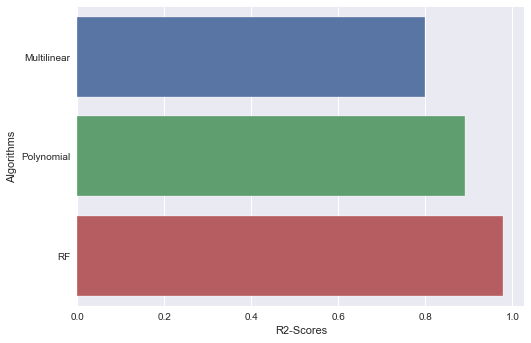

In [83]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)

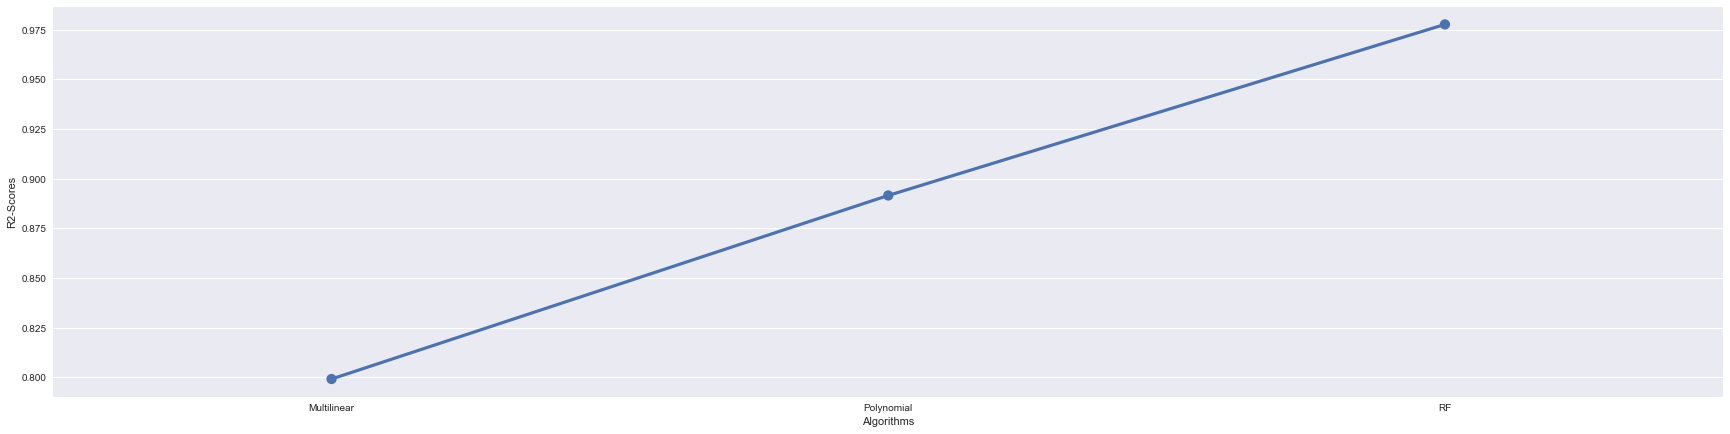

In [84]:
sns.factorplot(x='Algorithms', y='R2-Scores' , data=compare, size=6 , aspect=4)

<AxesSubplot:xlabel='R2-Scores', ylabel='Algorithms'>

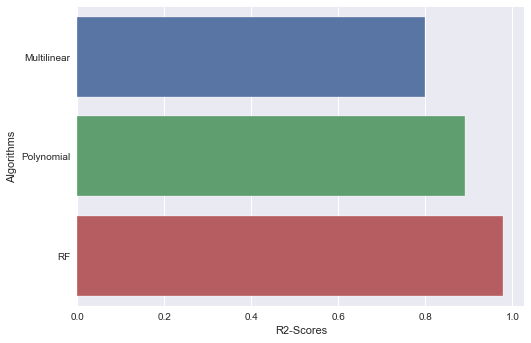

In [85]:
R2_Scores = [reg_metrics.loc['Test','R2'], lin_reg_2_metrics.loc['Test','R2'],
             #regr_metrics.loc['Train','R2'], lasso_metrics.loc['Test','R2'],
            rf_metrics.loc['Test','R2'],# svm_poly.loc['Test','R2']
            ]
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)

Logarithmic Transformation

In [86]:
data_log = data.copy()

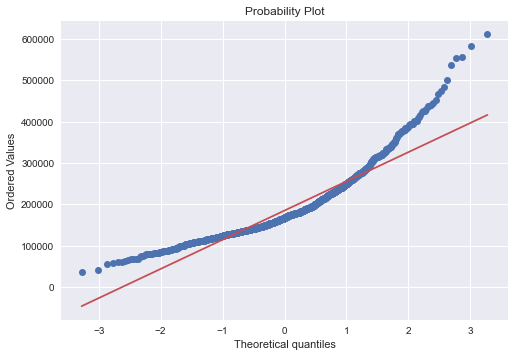

In [87]:
#Normal probability plot
res = stats.probplot(data_log['SalePrice'], plot=plt)

In [88]:
#Apply log transformation
data_log['SalePrice'] = np.log(data_log['SalePrice'])

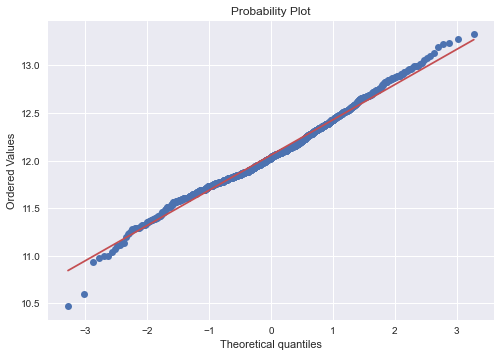

In [89]:
res = stats.probplot(data_log['SalePrice'], plot=plt)

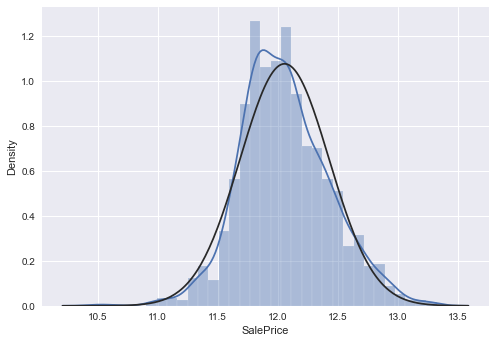

<Figure size 576x396 with 0 Axes>

In [90]:
sns.distplot(data_log['SalePrice'], fit=norm);
fig = plt.figure()

Re-running the model with logarithmic transformation

In [91]:
X = data_log.drop(['SalePrice'], axis = 1)
y = data_log['SalePrice']


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [93]:
rf_log = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1600, n_jobs=-1,
           oob_score=True, random_state=42, verbose=10, warm_start=False)

rf_log.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s


building tree 1 of 1600
building tree 2 of 1600
building tree 3 of 1600
building tree 4 of 1600
building tree 5 of 1600
building tree 6 of 1600
building tree 7 of 1600
building tree 8 of 1600
building tree 9 of 1600
building tree 10 of 1600
building tree 11 of 1600
building tree 12 of 1600building tree 13 of 1600

building tree 14 of 1600
building tree 15 of 1600
building tree 16 of 1600
building tree 17 of 1600building tree 18 of 1600

building tree 19 of 1600building tree 20 of 1600

building tree 21 of 1600
building tree 22 of 1600
building tree 23 of 1600
building tree 24 of 1600
building tree 25 of 1600
building tree 26 of 1600
building tree 27 of 1600
building tree 28 of 1600
building tree 29 of 1600
building tree 30 of 1600building tree 31 of 1600

building tree 32 of 1600building tree 33 of 1600

building tree 34 of 1600
building tree 35 of 1600building tree 36 of 1600

building tree 37 of 1600
building tree 38 of 1600
building tree 39 of 1600
building tree 40 of 1600
building 

[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 70 of 1600
building tree 71 of 1600
building tree 72 of 1600building tree 73 of 1600

building tree 74 of 1600building tree 75 of 1600
building tree 76 of 1600

building tree 77 of 1600building tree 78 of 1600

building tree 79 of 1600building tree 80 of 1600

building tree 81 of 1600
building tree 82 of 1600
building tree 83 of 1600building tree 84 of 1600building tree 85 of 1600


building tree 86 of 1600
building tree 87 of 1600
building tree 88 of 1600
building tree 89 of 1600
building tree 90 of 1600
building tree 91 of 1600building tree 92 of 1600

building tree 93 of 1600building tree 94 of 1600

building tree 95 of 1600
building tree 96 of 1600
building tree 97 of 1600building tree 98 of 1600

building tree 99 of 1600
building tree 100 of 1600
building tree 101 of 1600
building tree 102 of 1600
building tree 103 of 1600
building tree 104 of 1600building tree 105 of 1600

building tree 106 of 1600
building tree 107 of 1600
building tree 108 of 1600
building tree 10

[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s



building tree 190 of 1600
building tree 191 of 1600
building tree 192 of 1600building tree 193 of 1600

building tree 194 of 1600
building tree 195 of 1600building tree 196 of 1600building tree 197 of 1600

building tree 198 of 1600

building tree 199 of 1600
building tree 200 of 1600
building tree 201 of 1600
building tree 202 of 1600
building tree 203 of 1600building tree 204 of 1600

building tree 205 of 1600building tree 206 of 1600

building tree 207 of 1600
building tree 208 of 1600
building tree 209 of 1600
building tree 210 of 1600
building tree 211 of 1600
building tree 212 of 1600building tree 213 of 1600
building tree 214 of 1600

building tree 215 of 1600
building tree 216 of 1600building tree 217 of 1600

building tree 218 of 1600
building tree 219 of 1600
building tree 220 of 1600building tree 221 of 1600
building tree 222 of 1600building tree 223 of 1600

building tree 224 of 1600

building tree 225 of 1600building tree 226 of 1600

building tree 227 of 1600
building tr

[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s




building tree 256 of 1600building tree 257 of 1600

building tree 258 of 1600
building tree 259 of 1600
building tree 260 of 1600
building tree 261 of 1600
building tree 262 of 1600
building tree 263 of 1600building tree 264 of 1600

building tree 265 of 1600building tree 266 of 1600
building tree 267 of 1600

building tree 268 of 1600
building tree 269 of 1600
building tree 270 of 1600
building tree 271 of 1600
building tree 272 of 1600building tree 273 of 1600

building tree 274 of 1600
building tree 275 of 1600building tree 276 of 1600

building tree 277 of 1600
building tree 278 of 1600building tree 279 of 1600
building tree 280 of 1600

building tree 281 of 1600building tree 282 of 1600
building tree 283 of 1600

building tree 284 of 1600
building tree 285 of 1600
building tree 286 of 1600building tree 287 of 1600

building tree 288 of 1600
building tree 289 of 1600building tree 290 of 1600

building tree 291 of 1600
building tree 292 of 1600building tree 293 of 1600building tre

[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    0.9s



building tree 326 of 1600building tree 327 of 1600

building tree 328 of 1600building tree 329 of 1600

building tree 330 of 1600
building tree 331 of 1600building tree 332 of 1600

building tree 333 of 1600
building tree 334 of 1600
building tree 335 of 1600
building tree 336 of 1600building tree 337 of 1600

building tree 338 of 1600
building tree 339 of 1600building tree 340 of 1600

building tree 341 of 1600
building tree 342 of 1600
building tree 343 of 1600
building tree 344 of 1600building tree 345 of 1600

building tree 346 of 1600
building tree 347 of 1600
building tree 348 of 1600
building tree 349 of 1600
building tree 350 of 1600
building tree 351 of 1600building tree 352 of 1600
building tree 353 of 1600building tree 354 of 1600building tree 355 of 1600



building tree 356 of 1600
building tree 357 of 1600building tree 358 of 1600
building tree 359 of 1600
building tree 360 of 1600

building tree 361 of 1600
building tree 362 of 1600
building tree 363 of 1600
building tr

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s


building tree 446 of 1600
building tree 447 of 1600
building tree 448 of 1600building tree 449 of 1600
building tree 450 of 1600

building tree 451 of 1600
building tree 452 of 1600
building tree 453 of 1600
building tree 454 of 1600
building tree 455 of 1600
building tree 456 of 1600
building tree 457 of 1600
building tree 458 of 1600
building tree 459 of 1600
building tree 460 of 1600
building tree 461 of 1600
building tree 462 of 1600building tree 463 of 1600

building tree 464 of 1600
building tree 465 of 1600
building tree 466 of 1600building tree 467 of 1600
building tree 468 of 1600

building tree 469 of 1600
building tree 470 of 1600
building tree 471 of 1600
building tree 472 of 1600
building tree 473 of 1600
building tree 474 of 1600
building tree 475 of 1600
building tree 476 of 1600
building tree 477 of 1600
building tree 478 of 1600
building tree 479 of 1600
building tree 480 of 1600building tree 481 of 1600

building tree 482 of 1600building tree 483 of 1600
building tree

[Parallel(n_jobs=-1)]: Done 465 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 529 tasks      | elapsed:    1.5s



building tree 510 of 1600building tree 511 of 1600

building tree 512 of 1600
building tree 513 of 1600building tree 514 of 1600

building tree 515 of 1600
building tree 516 of 1600
building tree 517 of 1600building tree 518 of 1600

building tree 519 of 1600building tree 520 of 1600building tree 521 of 1600


building tree 522 of 1600
building tree 523 of 1600
building tree 524 of 1600
building tree 525 of 1600building tree 526 of 1600
building tree 527 of 1600

building tree 528 of 1600
building tree 529 of 1600building tree 530 of 1600

building tree 531 of 1600
building tree 532 of 1600building tree 533 of 1600building tree 534 of 1600


building tree 535 of 1600
building tree 536 of 1600building tree 537 of 1600
building tree 538 of 1600

building tree 539 of 1600
building tree 540 of 1600
building tree 541 of 1600
building tree 542 of 1600building tree 543 of 1600

building tree 544 of 1600
building tree 545 of 1600building tree 546 of 1600

building tree 547 of 1600
building tr

[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:    1.7s


building tree 579 of 1600building tree 580 of 1600

building tree 581 of 1600building tree 582 of 1600


building tree 583 of 1600
building tree 584 of 1600
building tree 585 of 1600
building tree 586 of 1600building tree 587 of 1600

building tree 588 of 1600
building tree 589 of 1600
building tree 590 of 1600
building tree 591 of 1600building tree 592 of 1600

building tree 593 of 1600building tree 594 of 1600

building tree 595 of 1600building tree 596 of 1600building tree 597 of 1600

building tree 598 of 1600building tree 599 of 1600


building tree 600 of 1600
building tree 601 of 1600
building tree 602 of 1600building tree 603 of 1600
building tree 604 of 1600
building tree 605 of 1600
building tree 606 of 1600
building tree 607 of 1600

building tree 608 of 1600
building tree 609 of 1600
building tree 610 of 1600
building tree 611 of 1600
building tree 612 of 1600
building tree 613 of 1600
building tree 614 of 1600
building tree 615 of 1600
building tree 616 of 1600building tre

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:    1.9s



building tree 702 of 1600
building tree 703 of 1600building tree 704 of 1600

building tree 705 of 1600
building tree 706 of 1600
building tree 707 of 1600
building tree 708 of 1600
building tree 709 of 1600building tree 710 of 1600

building tree 711 of 1600
building tree 712 of 1600
building tree 713 of 1600
building tree 714 of 1600building tree 715 of 1600
building tree 716 of 1600
building tree 717 of 1600

building tree 718 of 1600
building tree 719 of 1600
building tree 720 of 1600
building tree 721 of 1600
building tree 722 of 1600
building tree 723 of 1600
building tree 724 of 1600
building tree 725 of 1600building tree 726 of 1600

building tree 727 of 1600building tree 728 of 1600

building tree 729 of 1600
building tree 730 of 1600
building tree 731 of 1600
building tree 732 of 1600building tree 733 of 1600building tree 734 of 1600

building tree 735 of 1600building tree 736 of 1600building tree 737 of 1600

building tree 738 of 1600


building tree 739 of 1600
building tr

[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 745 tasks      | elapsed:    2.1s



building tree 768 of 1600
building tree 769 of 1600building tree 770 of 1600

building tree 771 of 1600
building tree 772 of 1600building tree 773 of 1600

building tree 774 of 1600
building tree 775 of 1600
building tree 776 of 1600building tree 777 of 1600

building tree 778 of 1600
building tree 779 of 1600
building tree 780 of 1600building tree 781 of 1600

building tree 782 of 1600
building tree 783 of 1600building tree 784 of 1600
building tree 785 of 1600

building tree 786 of 1600
building tree 787 of 1600
building tree 788 of 1600
building tree 789 of 1600building tree 790 of 1600

building tree 791 of 1600
building tree 792 of 1600
building tree 793 of 1600
building tree 794 of 1600
building tree 795 of 1600
building tree 796 of 1600
building tree 797 of 1600
building tree 798 of 1600
building tree 799 of 1600building tree 800 of 1600

building tree 801 of 1600
building tree 802 of 1600
building tree 803 of 1600building tree 804 of 1600

building tree 805 of 1600
building tr

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 825 tasks      | elapsed:    2.3s


building tree 834 of 1600



building tree 835 of 1600building tree 836 of 1600

building tree 837 of 1600
building tree 838 of 1600
building tree 839 of 1600
building tree 840 of 1600building tree 841 of 1600

building tree 842 of 1600
building tree 843 of 1600
building tree 844 of 1600
building tree 845 of 1600building tree 846 of 1600

building tree 847 of 1600building tree 848 of 1600
building tree 849 of 1600

building tree 850 of 1600
building tree 851 of 1600
building tree 852 of 1600
building tree 853 of 1600
building tree 854 of 1600
building tree 855 of 1600
building tree 856 of 1600building tree 857 of 1600
building tree 858 of 1600
building tree 859 of 1600

building tree 860 of 1600
building tree 861 of 1600building tree 862 of 1600

building tree 863 of 1600
building tree 864 of 1600building tree 865 of 1600
building tree 866 of 1600

building tree 867 of 1600building tree 868 of 1600

building tree 869 of 1600
building tree 870 of 1600building tree 871 of 1600

building 

[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 909 tasks      | elapsed:    2.6s


building tree 895 of 1600building tree 896 of 1600

building tree 897 of 1600
building tree 898 of 1600building tree 899 of 1600
building tree 900 of 1600building tree 901 of 1600


building tree 902 of 1600building tree 903 of 1600
building tree 904 of 1600building tree 905 of 1600

building tree 906 of 1600
building tree 907 of 1600
building tree 908 of 1600

building tree 909 of 1600
building tree 910 of 1600
building tree 911 of 1600
building tree 912 of 1600building tree 913 of 1600

building tree 914 of 1600building tree 915 of 1600

building tree 916 of 1600
building tree 917 of 1600
building tree 918 of 1600
building tree 919 of 1600
building tree 920 of 1600
building tree 921 of 1600
building tree 922 of 1600building tree 923 of 1600building tree 924 of 1600


building tree 925 of 1600
building tree 926 of 1600
building tree 927 of 1600
building tree 928 of 1600
building tree 929 of 1600
building tree 930 of 1600
building tree 931 of 1600
building tree 932 of 1600building tree

[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:    2.8s



building tree 967 of 1600building tree 968 of 1600

building tree 969 of 1600
building tree 970 of 1600
building tree 971 of 1600
building tree 972 of 1600
building tree 973 of 1600building tree 974 of 1600

building tree 975 of 1600
building tree 976 of 1600
building tree 977 of 1600
building tree 978 of 1600building tree 979 of 1600

building tree 980 of 1600
building tree 981 of 1600
building tree 982 of 1600
building tree 983 of 1600
building tree 984 of 1600building tree 985 of 1600

building tree 986 of 1600
building tree 987 of 1600
building tree 988 of 1600
building tree 989 of 1600building tree 990 of 1600
building tree 991 of 1600

building tree 992 of 1600
building tree 993 of 1600
building tree 994 of 1600building tree 995 of 1600

building tree 996 of 1600
building tree 997 of 1600building tree 998 of 1600

building tree 999 of 1600building tree 1000 of 1600building tree 1001 of 1600

building tree 1002 of 1600

building tree 1003 of 1600
building tree 1004 of 1600
buildi

[Parallel(n_jobs=-1)]: Done 1042 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1089 tasks      | elapsed:    3.1s


building tree 1101 of 1600
building tree 1102 of 1600building tree 1103 of 1600

building tree 1104 of 1600building tree 1105 of 1600

building tree 1106 of 1600
building tree 1107 of 1600building tree 1108 of 1600

building tree 1109 of 1600
building tree 1110 of 1600
building tree 1111 of 1600building tree 1112 of 1600
building tree 1113 of 1600

building tree 1114 of 1600building tree 1115 of 1600

building tree 1116 of 1600
building tree 1117 of 1600
building tree 1118 of 1600
building tree 1119 of 1600building tree 1120 of 1600

building tree 1121 of 1600
building tree 1122 of 1600building tree 1123 of 1600building tree 1124 of 1600


building tree 1125 of 1600building tree 1126 of 1600

building tree 1127 of 1600
building tree 1128 of 1600
building tree 1129 of 1600
building tree 1130 of 1600
building tree 1131 of 1600
building tree 1132 of 1600
building tree 1133 of 1600
building tree 1134 of 1600
building tree 1135 of 1600
building tree 1136 of 1600
building tree 1137 of 1600
b

[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1185 tasks      | elapsed:    3.3s


building tree 1172 of 1600building tree 1173 of 1600


building tree 1174 of 1600
building tree 1175 of 1600
building tree 1176 of 1600
building tree 1177 of 1600building tree 1178 of 1600
building tree 1179 of 1600

building tree 1180 of 1600
building tree 1181 of 1600
building tree 1182 of 1600building tree 1183 of 1600

building tree 1184 of 1600
building tree 1185 of 1600building tree 1186 of 1600

building tree 1187 of 1600
building tree 1188 of 1600
building tree 1189 of 1600building tree 1190 of 1600
building tree 1191 of 1600

building tree 1192 of 1600building tree 1193 of 1600

building tree 1194 of 1600
building tree 1195 of 1600building tree 1196 of 1600

building tree 1197 of 1600
building tree 1198 of 1600building tree 1199 of 1600building tree 1200 of 1600


building tree 1201 of 1600
building tree 1202 of 1600
building tree 1203 of 1600building tree 1204 of 1600

building tree 1205 of 1600building tree 1206 of 1600

building tree 1207 of 1600building tree 1208 of 1600



[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1285 tasks      | elapsed:    3.6s




building tree 1301 of 1600
building tree 1302 of 1600
building tree 1303 of 1600
building tree 1304 of 1600
building tree 1305 of 1600
building tree 1306 of 1600
building tree 1307 of 1600building tree 1308 of 1600

building tree 1309 of 1600
building tree 1310 of 1600
building tree 1311 of 1600building tree 1312 of 1600

building tree 1313 of 1600building tree 1314 of 1600
building tree 1315 of 1600

building tree 1316 of 1600
building tree 1317 of 1600
building tree 1318 of 1600
building tree 1319 of 1600building tree 1320 of 1600

building tree 1321 of 1600building tree 1322 of 1600
building tree 1323 of 1600building tree 1324 of 1600


building tree 1325 of 1600
building tree 1326 of 1600
building tree 1327 of 1600
building tree 1328 of 1600building tree 1329 of 1600
building tree 1330 of 1600

building tree 1331 of 1600building tree 1332 of 1600

building tree 1333 of 1600
building tree 1334 of 1600building tree 1335 of 1600

building tree 1336 of 1600building tree 1337 of 1600


[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1389 tasks      | elapsed:    3.9s



building tree 1371 of 1600building tree 1372 of 1600

building tree 1373 of 1600building tree 1374 of 1600

building tree 1375 of 1600building tree 1376 of 1600

building tree 1377 of 1600
building tree 1378 of 1600building tree 1379 of 1600

building tree 1380 of 1600
building tree 1381 of 1600building tree 1382 of 1600

building tree 1383 of 1600
building tree 1384 of 1600building tree 1385 of 1600

building tree 1386 of 1600building tree 1387 of 1600building tree 1388 of 1600


building tree 1389 of 1600building tree 1390 of 1600

building tree 1391 of 1600
building tree 1392 of 1600
building tree 1393 of 1600
building tree 1394 of 1600
building tree 1395 of 1600building tree 1396 of 1600building tree 1397 of 1600


building tree 1398 of 1600building tree 1399 of 1600

building tree 1400 of 1600
building tree 1401 of 1600
building tree 1402 of 1600
building tree 1403 of 1600
building tree 1404 of 1600
building tree 1405 of 1600building tree 1406 of 1600building tree 1407 of 1600bui

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:    4.1s


building tree 1489 of 1600building tree 1490 of 1600

building tree 1491 of 1600
building tree 1492 of 1600
building tree 1493 of 1600
building tree 1494 of 1600
building tree 1495 of 1600building tree 1496 of 1600building tree 1497 of 1600


building tree 1498 of 1600
building tree 1499 of 1600building tree 1500 of 1600

building tree 1501 of 1600building tree 1502 of 1600
building tree 1503 of 1600
building tree 1504 of 1600

building tree 1505 of 1600
building tree 1506 of 1600building tree 1507 of 1600

building tree 1508 of 1600
building tree 1509 of 1600
building tree 1510 of 1600
building tree 1511 of 1600building tree 1512 of 1600

building tree 1513 of 1600
building tree 1514 of 1600building tree 1515 of 1600building tree 1516 of 1600building tree 1517 of 1600



building tree 1518 of 1600
building tree 1519 of 1600
building tree 1520 of 1600
building tree 1521 of 1600building tree 1522 of 1600

building tree 1523 of 1600
building tree 1524 of 1600building tree 1525 of 1600bui

[Parallel(n_jobs=-1)]: Done 1497 tasks      | elapsed:    4.3s


building tree 1545 of 1600building tree 1546 of 1600building tree 1547 of 1600


building tree 1548 of 1600building tree 1549 of 1600

building tree 1550 of 1600building tree 1551 of 1600

building tree 1552 of 1600building tree 1553 of 1600building tree 1554 of 1600building tree 1555 of 1600



building tree 1556 of 1600
building tree 1557 of 1600
building tree 1558 of 1600building tree 1559 of 1600building tree 1560 of 1600


building tree 1561 of 1600
building tree 1562 of 1600
building tree 1563 of 1600
building tree 1564 of 1600
building tree 1565 of 1600building tree 1566 of 1600

building tree 1567 of 1600
building tree 1568 of 1600building tree 1569 of 1600

building tree 1570 of 1600building tree 1571 of 1600building tree 1572 of 1600

building tree 1573 of 1600
building tree 1574 of 1600

building tree 1575 of 1600
building tree 1576 of 1600
building tree 1577 of 1600
building tree 1578 of 1600building tree 1579 of 1600

building tree 1580 of 1600
building tree 1581 of 1600bu

[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    4.6s finished


building tree 1596 of 1600building tree 1597 of 1600building tree 1598 of 1600


building tree 1599 of 1600
building tree 1600 of 1600


RandomForestRegressor(max_depth=10, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_split=5,
                      n_estimators=1600, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=10)

In [94]:
rf_log_metrics = Allmetrics(rf_log, X_train, y_train, X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1042 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1089 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1185 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1285 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1336 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1389 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1497 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1552 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | 

In [95]:
print ('Random Forest- Randomized Search')
print (reg_rf_random_metrics)
print ('--------------------------------')
print ('Random Forest-Log Randomized Search')
print (rf_log_metrics)

Random Forest- Randomized Search
                MAE           MSE          RMSE        R2  CV_R2
Train   9681.940615  1.893395e+08  13760.070376  0.963611  0.837
Test   20890.650068  1.016666e+09  31885.199097  0.840998    NaN
--------------------------------
Random Forest-Log Randomized Search
            MAE       MSE      RMSE        R2  CV_R2
Train  0.062583  0.007405  0.086055  0.943117  0.831
Test   0.110911  0.026813  0.163748  0.823990    NaN


In [96]:
y_pred_log = rf_log.predict(X_test)
y_pred_log

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

array([11.76240694, 12.21424012, 11.84620723, 11.63212251, 11.91136976,
       11.85922324, 12.61294841, 12.60063402, 12.38978743, 11.93810858,
       12.1921984 , 12.09294259, 12.27256588, 12.46409051, 12.25538829,
       11.78521962, 12.6457452 , 12.66243705, 12.30373787, 11.72808751,
       11.97129758, 11.83370159, 11.89348217, 12.35445572, 11.78686733,
       12.38961415, 11.89461487, 12.25576559, 11.97533116, 11.84635853,
       12.28771702, 12.18375683, 11.72387926, 12.08272065, 12.05690939,
       12.05879198, 11.69944701, 11.78734743, 11.87583437, 11.51708664,
       12.41378383, 12.2300553 , 11.33843128, 11.83557971, 12.46007832,
       12.28683598, 12.37244465, 12.64604572, 11.81829708, 11.28399983,
       12.7789994 , 11.62810365, 12.27265474, 12.05032919, 11.71591912,
       12.04388906, 11.7270555 , 12.00573296, 11.82689201, 11.94817235,
       11.77715523, 11.70767213, 11.4557539 , 12.26454167, 11.88695716,
       12.07601328, 11.62588939, 11.99547482, 11.72055173, 11.90

### Regularisation

#### Ridge

In [97]:
rr = Ridge(alpha=[10])
rr.fit(X_train, y_train)

Ridge(alpha=[10])

In [98]:
y_pred = rr.predict(X_test)

In [99]:
rr_metrics = Allmetrics(rr, X_train,y_train,X_test,y_test)
rr_metrics

,MAE,MSE,RMSE,R2,CV_R2
Train,0.115165,0.025076,0.158353,0.807388,0.785
Test,0.128768,0.032586,0.180516,0.786098,NaN


trying out range of alpha values

In [101]:
regr_cv = RidgeCV(alphas=[0.1,0.5, 1.0, 10.0])
regr_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.5,  1. , 10. ]))

In [102]:
regr_cv.alpha_

10.0

In [103]:
regr_cv_bestalpha = Ridge(alpha=[1])
regr_cv_bestalpha.fit(X_train, y_train)

Ridge(alpha=[1])

In [104]:
y_pred = regr_cv_bestalpha.predict(X_test)

In [105]:
regr_metrics = Allmetrics(regr_cv_bestalpha, X_train,y_train,X_test,y_test)
regr_metrics

,MAE,MSE,RMSE,R2,CV_R2
Train,0.115273,0.025071,0.158339,0.807423,0.785
Test,0.128836,0.032572,0.180476,0.786192,NaN


#### Lasso

In [106]:
clf_la = Lasso()
clf_la.fit(X_train , y_train)

Lasso()

In [107]:
lasso_metrics = Allmetrics(clf_la, X_train, y_train, X_test, y_test)
lasso_metrics

,MAE,MSE,RMSE,R2,CV_R2
Train,0.159425,0.046499,0.215636,0.642833,0.616
Test,0.170834,0.055041,0.234607,0.638699,NaN


### Trying a pipeline

In [118]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('MLR'   , LinearRegression()))
    #basedModels.append(('POLYR'  , PolynomialFeatures()))
    basedModels.append(('RIDGER' , Ridge()))
    basedModels.append(('LASSOR'  , Lasso()))
    basedModels.append(('DECTREER',  DecisionTreeRegressor()))
    basedModels.append(('RFR'   , RandomForestRegressor()))
    basedModels.append(('SVMR'   , SVR())) 

    return basedModels

In [119]:
def BasedModels(X_train, y_train,models):
    """
    BasedModels will return the evaluation metric 'accuracy' after performing
    a CV for each of the models
    input:
    X_train
    y_train
    models = array containing the different instantiated models
    
    output:
    names = names of the diff models tested
    results = results of the diff models
    """
    # Test options and evaluation metric
    num = 10
    #num_folds =  k_folds
    scoring = 'r2'

    results = []
    names = []
    for name, model in models:
           
        cv_results = cross_val_score(model, X_train, y_train,cv=num, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: r2 = %f " % (name, cv_results.mean())
        print(msg)
        
    return names, results

In [120]:
models = GetBasedModel()
models

[('MLR', LinearRegression()),
 ('RIDGER', Ridge()),
 ('LASSOR', Lasso()),
 ('DECTREER', DecisionTreeRegressor()),
 ('RFR', RandomForestRegressor()),
 ('SVMR', SVR())]

In [121]:
names,results = BasedModels(X_train, y_train,models)

MLR: r2 = 0.784991 
RIDGER: r2 = 0.784996 
LASSOR: r2 = 0.616175 
DECTREER: r2 = 0.661975 
RFR: r2 = 0.818653 
SVMR: r2 = 0.669334 


In [122]:
def MetricsClas(models,X_train, y_train, X_test, y_test):
    for name, model in models:
        print('-*-'*25)
        print('Assessment of ', str(name), '\n')
        model_fit = model.fit(X_train, y_train)
        print (Allmetrics(model_fit, X_train, y_train, X_test, y_test))


In [123]:
MetricsClas(models,X_train, y_train, X_test, y_test)

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Assessment of  MLR 

            MAE       MSE      RMSE        R2  CV_R2
Train  0.115286  0.025071  0.158339  0.807423  0.785
Test   0.128844  0.032570  0.180473  0.786199    NaN
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Assessment of  RIDGER 

            MAE       MSE      RMSE        R2  CV_R2
Train  0.115273  0.025071  0.158339  0.807423  0.785
Test   0.128836  0.032572  0.180476  0.786192    NaN
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Assessment of  LASSOR 

            MAE       MSE      RMSE        R2  CV_R2
Train  0.159425  0.046499  0.215636  0.642833  0.616
Test   0.170834  0.055041  0.234607  0.638699    NaN
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Assessment of  DECTREER 

            MAE       MSE      RMSE        R2  CV_R2
Train  0.002183  0.000158  0.012569  0.998787  0.656
Test   0.151206  0